In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("shopping_trends_updated.csv")

In [21]:
X = df[['Frequency of Purchases']]
y = df['Discount Applied']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
tree_preds = tree_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, tree_preds))

Accuracy: 0.541025641025641


In [25]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

          No       0.54      1.00      0.70       422
         Yes       0.00      0.00      0.00       358

    accuracy                           0.54       780
   macro avg       0.27      0.50      0.35       780
weighted avg       0.29      0.54      0.38       780



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [27]:
misclassified_samples_tree = X_test[y_test != tree_preds]
print(misclassified_samples_tree.head())

      Frequency of Purchases_Bi-Weekly  Frequency of Purchases_Every 3 Months   
839                              False                                   True  \
321                              False                                  False   
366                              False                                  False   
1096                             False                                  False   
1659                             False                                  False   

      Frequency of Purchases_Fortnightly  Frequency of Purchases_Monthly   
839                                False                           False  \
321                                False                           False   
366                                 True                           False   
1096                               False                           False   
1659                               False                           False   

      Frequency of Purchases_Quarterly  Frequency of Pur

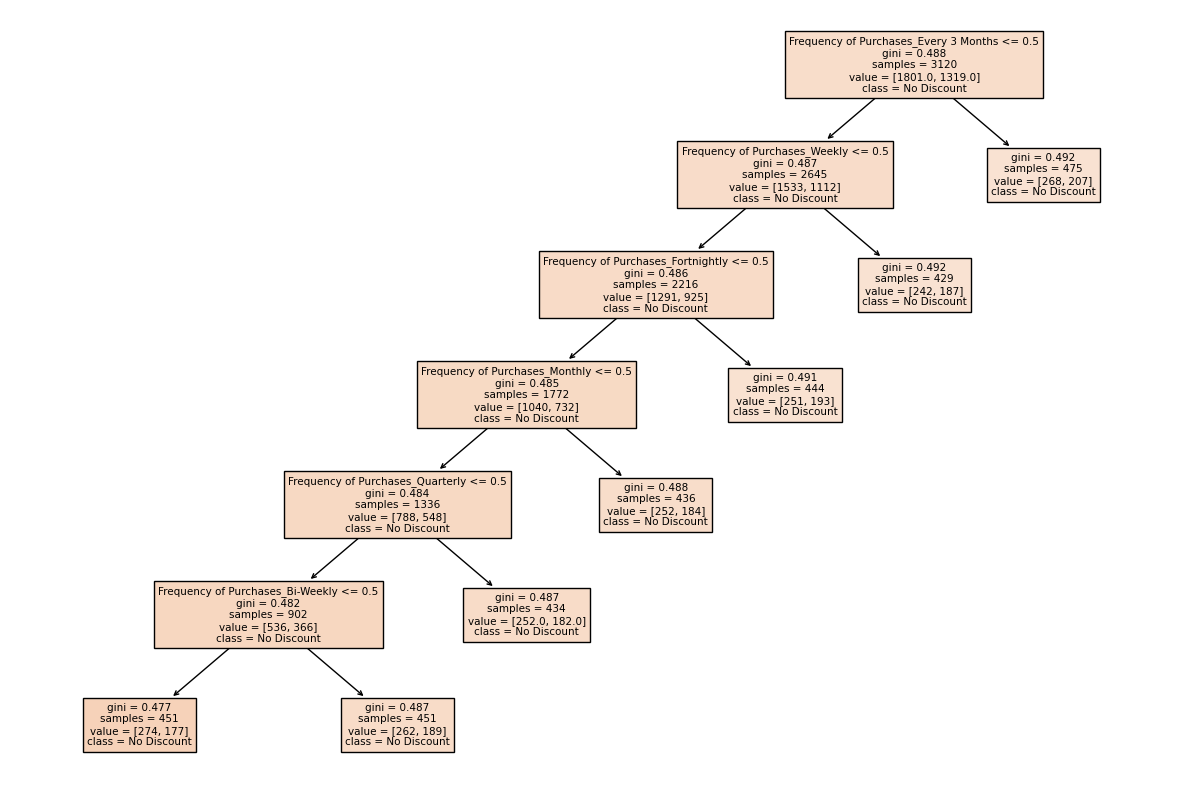

In [28]:
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, feature_names=X_encoded.columns, class_names=['No Discount', 'Discount'], filled=True)
plt.show()